1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import scipy
import seaborn as sns


In [2]:
my_path = r'C:\Users\nkasb\Documents\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(my_path, '2. Data','Prepared Data', 'orders_products_costumers.pkl'))

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
df_1 = df.drop(columns = ['Last_name', 'First_name'])

In [5]:
df_1.head()

,user_id,Gender,State,Age,Date_joined,n_dependants,Fam_status,Income,Unnamed: 0_x,product_id,...,_merge,busiest day,busiest days,busiest_period_of_days,max_order,loyalty_flag,Spending_flag,median_orders,frequency_flag,true
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,195.0,196.0,...,both,Regularly busy,Busiest days,Most orders,9.0,New customer,Low spender,30.0,non-frequent customer,both
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,195.0,196.0,...,both,Regularly busy,Least busy days,Most orders,9.0,New customer,Low spender,30.0,non-frequent customer,both
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,195.0,196.0,...,both,Regularly busy,Busiest days,Most orders,9.0,New customer,Low spender,30.0,non-frequent customer,both
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,6184.0,...,both,Regularly busy,Regularly busy days,Most orders,9.0,New customer,Low spender,30.0,non-frequent customer,both
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,6184.0,...,both,Regularly busy,Regularly busy days,Most orders,9.0,New customer,Low spender,30.0,non-frequent customer,both


3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [6]:
df_1.loc[df_1['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York',
'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [7]:
df_1.loc[df_1['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [8]:
df_1.loc[df_1['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 
'Louisiana']), 'Region'] = 'South'

In [9]:
df_1.loc[df_1['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'

In [10]:
df_1['Region'].value_counts()

South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: Region, dtype: int64

In [11]:
df_2 = df_1.groupby(['Region', 'Spending_flag']).size().unstack(fill_value=0)

In [12]:
df_2.head()

Spending_flag,High spender,Low spender
Region,,
Midwest,2052780,1310931
Northeast,1543881,984576
South,2920983,1854651
West,2237319,1430286


In [13]:
df__2 = df_1[['Region', 'Spending_flag']]

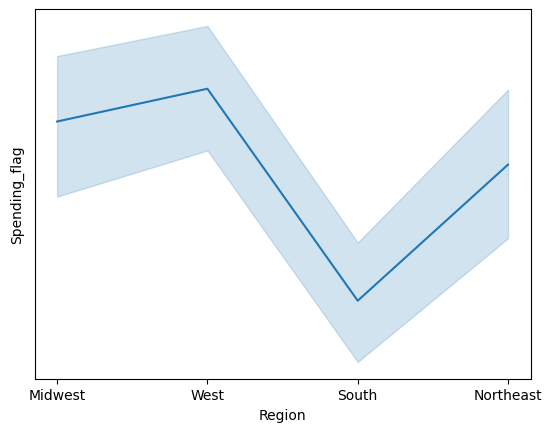

In [14]:
line_1 = sns.lineplot(data = df__2, x = 'Region',y = 'Spending_flag')

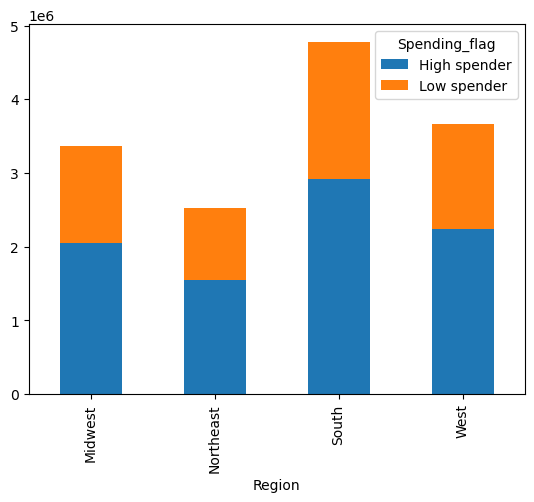

In [15]:
bar_ = df_2.plot.bar(stacked = True)

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
df_1.loc[df_1['max_order'] > 5, 'order_range'] = 'High_activity' 
df_1.loc[df_1['max_order'] <= 5, 'order_range'] = 'Low_activity'

In [17]:
df_1.loc[df_1['n_dependants'] > 0, 'dependants_flag'] = 'has_dependants' 
df_1.loc[df_1['n_dependants'] == 0, 'dependants_flag'] = 'has_no_dependants'

In [18]:
df_high_activity = df_1.loc[df_1['max_order'] > 5, 'order_range'] 

In [19]:
df_high_activity.shape

(31157244,)

In [20]:
df_high_activity.head()

0    High_activity
1    High_activity
2    High_activity
3    High_activity
4    High_activity
Name: order_range, dtype: object

In [128]:
df_high_activity.to_pickle(os.path.join(my_path, '2. Data','Prepared Data', 'df_order_over_5.pkl'))

5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [22]:
df_1['Fam_status'].value_counts()

married                             22923193
single                               5365090
divorced/widowed                     2792213
living with parents and siblings     1561954
Name: Fam_status, dtype: int64

In [23]:
df_1.loc[ (df_1['Fam_status'] == 'single') & (df_1['Age']>= 18), 'Profil_variable'] = 'single adult'
df_1.loc[(df_1['Age'] < 35) & (df_1['n_dependants'] > 1), 'Profil_variable'] = 'young parent' 


In [24]:
df_1.loc[(df_1['Age']<35), 'Profil_variable_0'] = 'young adult'
df_1.loc[(df_1['Age'] >= 35) & (df_1['n_dependants'] < 65 ), 'Profil_variable_0'] = 'Adult'
df_1.loc[(df_1['Age']>= 65), 'Profil_variable_0'] = 'retired adult'


In [25]:
df_1.loc[(df_1['Income'] < 6.697900e+04), 'Profil_variable_1'] = 'low income client'
df_1.loc[(df['Income'] <= 1.278650e+05) & (df['Income'] >= 6.697900e+04), 'Profil_variable_1'] = 'middle income client'            
df_1.loc[(df_1['Income'] > 1.278650e+05), 'Profil_variable_1'] = 'high income client'

In [26]:
df_1['Profil_variable_1'].value_counts()

middle income client    16321826
high income client       8160467
low income client        8160157
Name: Profil_variable_1, dtype: int64

In [27]:
df_1.loc[ (df_1['order_hour_of_day']< 8), 'Profil_variable_2'] = 'early client'
df_1.loc[(df_1['order_hour_of_day'] >= 8), 'Profil_variable_2'] = 'regular client' 


In [28]:
df_1['Profil_variable_2'].value_counts()

regular client    30851886
early client       1790564
Name: Profil_variable_2, dtype: int64

In [29]:
df_1.loc[df_1['n_dependants'] >= 1, 'Profil_variable_3'] = 'Has Dependants'
df_1.loc[df_1['n_dependants'] < 1, 'Profil_variable_3'] = 'Has not Dependants'

In [30]:
df_1.loc[(df_1['Age'] <= 30), 'age_profile'] = 'jung adult'
df_1.loc[(df['Age'] > 30) & (df_1['Age'] >= 55), 'age_profile'] = 'adult'            
df_1.loc[(df_1['Age'] > 55), 'age_Profile'] = 'elderly'

6. Create an appropriate visualization to show the distribution of profiles.

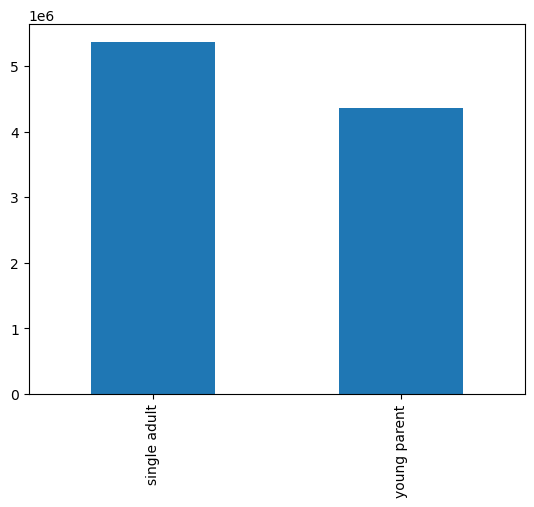

In [31]:
bar_1 = df_1['Profil_variable'].value_counts().plot.bar()

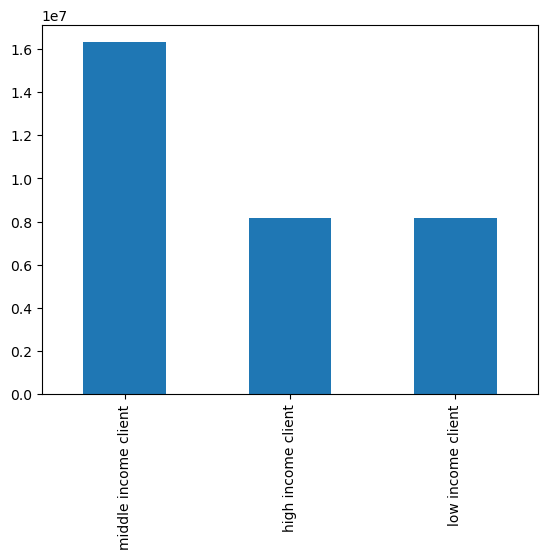

In [32]:
bar_2 = df_1['Profil_variable_1'].value_counts().plot.bar()

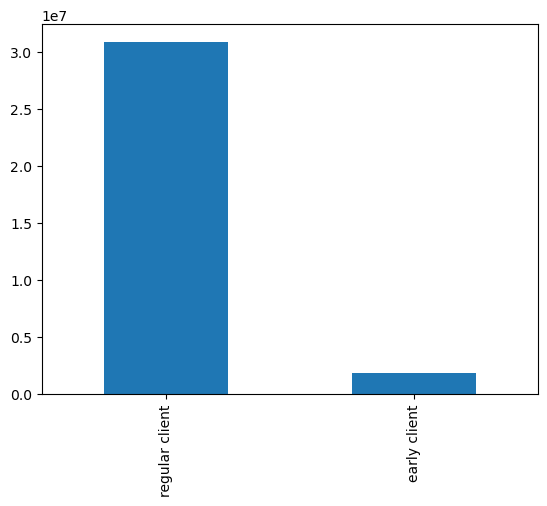

In [33]:
bar_3 = df_1['Profil_variable_2'].value_counts().plot.bar()

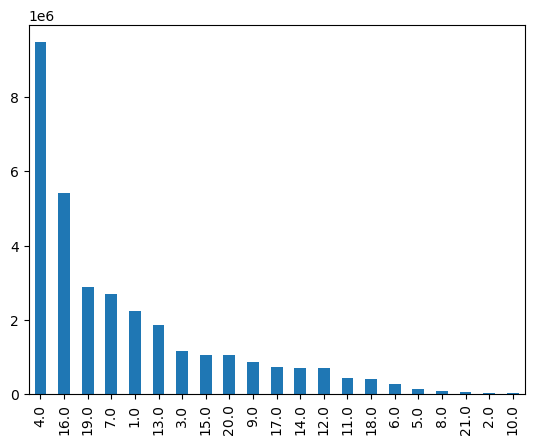

In [34]:

bar_4 = df_1['department_id'].value_counts().plot.bar()

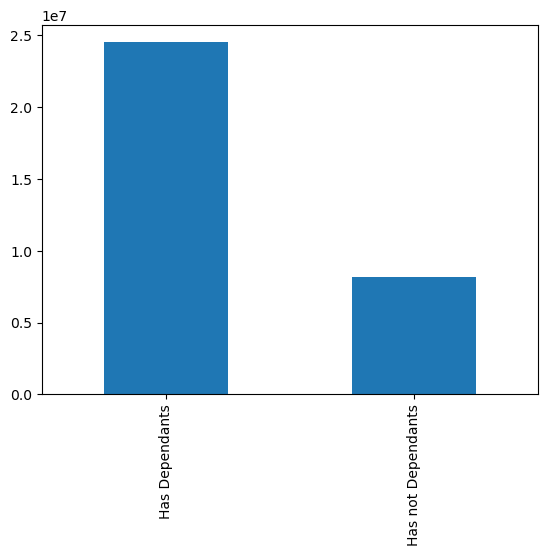

In [35]:
bar_5 = df_1['Profil_variable_3'].value_counts().plot.bar()

In [36]:
bar_1.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_1_dept.png'))
bar_2.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_2_dept.png'))
bar_3.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_3_dept.png'))
bar_4.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_4_dept.png'))
bar_5.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_5_dept.png'))

In [37]:
department_income = df_1.groupby(['department_id','Profil_variable_1']).size().unstack(fill_value=0)

In [38]:
department_income.head()

Profil_variable_1,high income client,low income client,middle income client
department_id,,,
1.0,569893,539114,1127425
2.0,9161,9059,18071
3.0,304247,278766,593774
4.0,2394307,2209998,4874986
5.0,43035,39696,71012


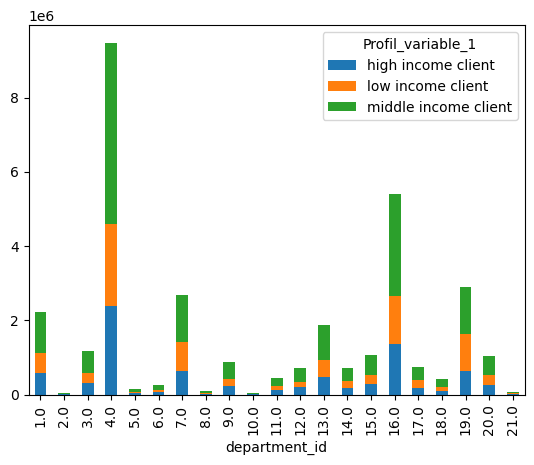

In [39]:
bar_6 = department_income.plot.bar(stacked=True)

In [40]:
bar_6.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_6_dept.png'))

In [41]:
department_status = df_1.groupby(['department_id','Profil_variable']).size().unstack(fill_value=0)

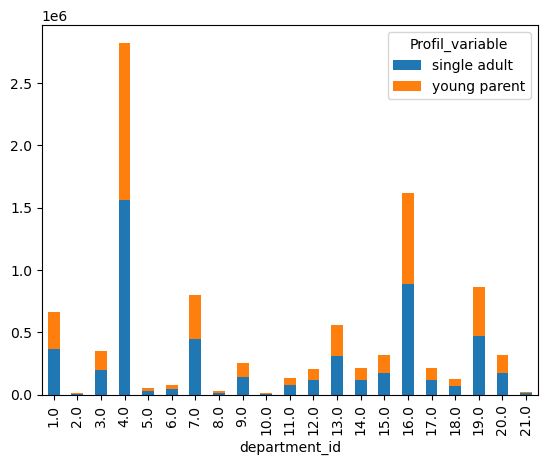

In [42]:
bar_7 = department_status.plot.bar(stacked=True)

In [43]:
department_time_client = df_1.groupby(['department_id','Profil_variable_2']).size().unstack(fill_value=0)

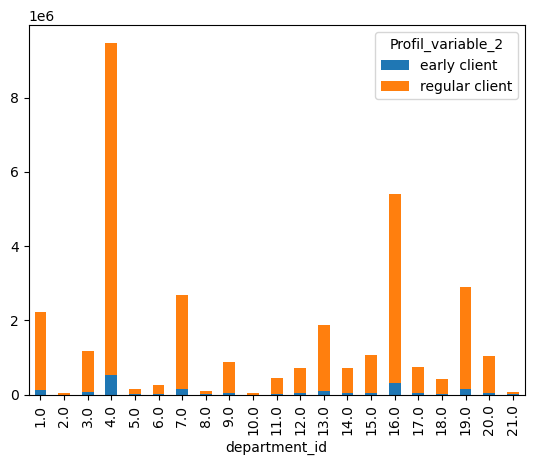

In [44]:
bar_8 = department_time_client.plot.bar(stacked=True)

In [45]:
department_dependants = df_1.groupby(['department_id','Profil_variable_3']).size().unstack(fill_value=0)

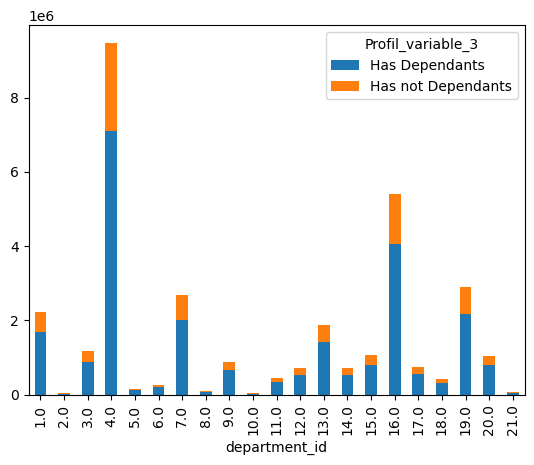

In [46]:
bar_9 = department_dependants.plot.bar(stacked=True)

In [47]:
bar_7.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_7_dept.png'))
bar_8.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_8_dept.png'))
bar_9.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_9_dept.png'))

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [48]:
df_1.groupby('Profil_variable_1').agg({'prices': ['mean', 'min', 'max']})

prices           
                          mean  min   max
Profil_variable_1                        
high income client    7.961619  1.0  25.0
low income client     7.288196  1.0  25.0
middle income client  7.966053  1.0  25.0

In [49]:
df_1.groupby('Profil_variable_0').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
Profil_variable_0                     
Adult              7.795583  1.0  25.0
retired adult      7.801215  1.0  25.0
young adult        7.790442  1.0  25.0

In [50]:
df_1.groupby('Profil_variable_3').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
Profil_variable_3                      
Has Dependants      7.795974  1.0  25.0
Has not Dependants  7.794896  1.0  25.0

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [51]:
df_0 = df_1.groupby(['department_id','Region']).size().unstack(fill_value=0)

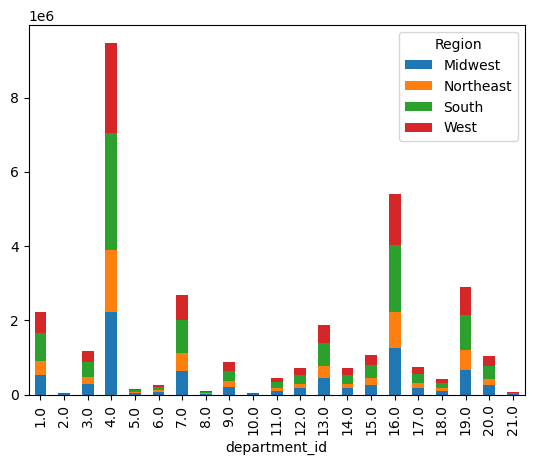

In [52]:
bar_10= df_0.plot.bar(stacked=True)

In the south it appears that the department 4,16,7, 19, 1 are the most appreciated and South has the biggest proportion of customers


9. Produce suitable charts to illustrate your results and export them in your project folder.

In [53]:
df_1.groupby('Fam_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
Fam_status                                                        
divorced/widowed                              10.383591  0.0  30.0
living with parents and siblings              10.387311  0.0  30.0
married                                       10.445550  0.0  30.0
single                                        10.429571  0.0  30.0

In [54]:
region_age = df_1.groupby(['Region','Profil_variable_0']).size().unstack(fill_value=0)

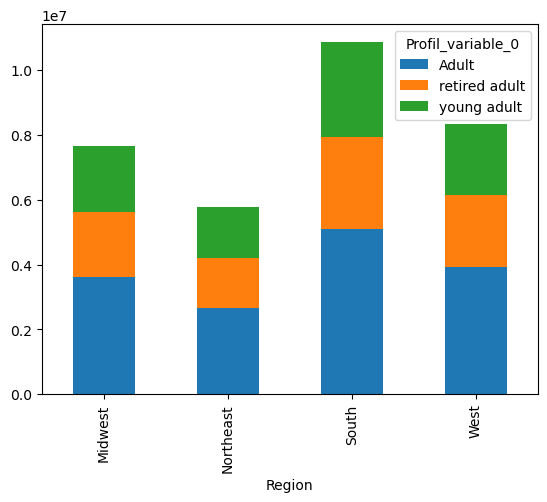

In [55]:
bar_11 = region_age.plot.bar(stacked=True)

In [56]:
bar_10.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_10_dept.png'))
bar_11.figure.savefig(os.path.join(my_path, '4. Analysis','Visualisations', 'bar_11_dept.png'))

In [57]:
region_dependants = df_1.groupby(['Region', 'Profil_variable_3']).size().unstack(fill_value=0)

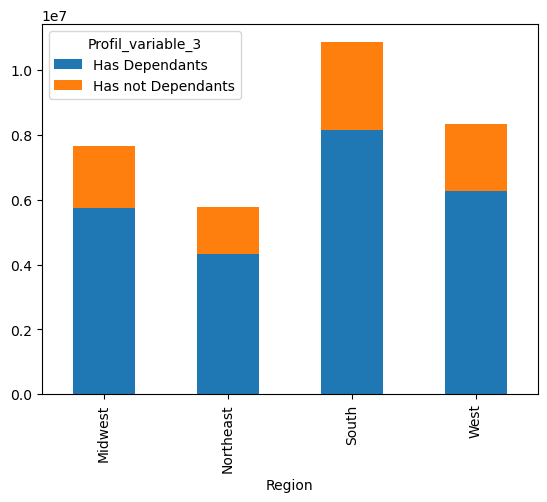

In [58]:
bar_12 = region_dependants.plot.bar(stacked=True)

In [60]:
df_1.to_pickle(os.path.join(my_path, '2. Data','Prepared Data', 'orders_products_costumers_task_10.pkl'))

MemoryError: 

In [61]:
high_spending_hours = df_1.groupby(['order_hour_of_day', 'prices']).size().unstack(fill_value=0)

In [62]:
high_spending_hours.loc[:,'Total'] = high_spending_hours.mean(axis=1)

In [63]:
high_spending_hours.head()

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0,Total
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0.0,790,1712,1667,2825,2692,1022,2065,1557,2131,1033,...,112,17,1,9,22,45,2,37,99,912.145833
1.0,370,896,880,1480,1372,573,1093,813,1165,581,...,69,11,2,9,8,23,2,18,37,482.370833
2.0,243,513,523,891,820,331,639,542,667,348,...,33,6,2,3,2,10,1,11,31,289.233333
3.0,190,386,389,569,550,262,453,371,492,255,...,22,4,2,1,3,16,2,9,19,213.766667
4.0,198,403,438,733,624,247,497,381,452,260,...,16,11,1,3,2,19,1,7,16,221.970833


In [64]:
hph_df2 = high_spending_hours.loc[:, ["Total"]]

In [65]:
hph_df2.head()

prices,Total
order_hour_of_day,
0.0,912.145833
1.0,482.370833
2.0,289.233333
3.0,213.766667
4.0,221.970833


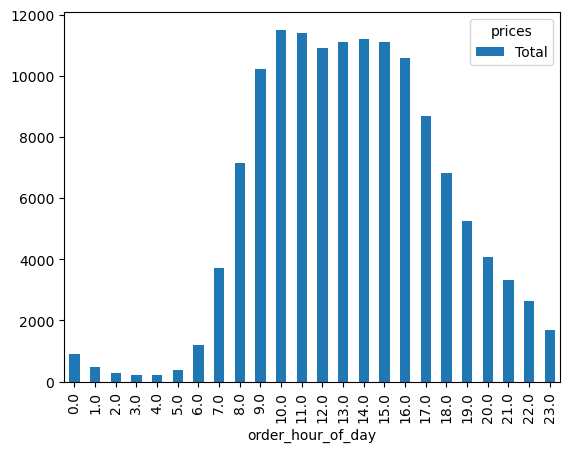

In [66]:
bar_13 = hph_df2.plot.bar()

In [67]:
bar_13.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Mean_prices per_order_hour_of_day.png'))

In [68]:
popular_department = df_1.groupby(['department_id', 'order_number']).size().unstack(fill_value=0)

In [69]:
popular_department.head()

order_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
department_id,,,,,,,,,,,,,,,,,,,,,
1.0,158323,156333,156055,136877,121677,108726,96898,89136,80904,73614,...,819,815,737,788,753,713,695,654,644,589
2.0,2366,2356,2329,2074,1836,1620,1498,1327,1242,1094,...,24,17,23,23,18,19,23,14,12,17
3.0,75541,73810,74620,66118,58866,53470,48383,44076,40824,37233,...,628,604,547,568,558,528,504,496,422,521
4.0,584384,575972,577644,514200,461003,417515,380822,348286,322424,297257,...,5889,5603,5383,5138,5036,4919,4572,4474,4419,4051
5.0,12718,11878,11410,9735,8391,7573,6712,6028,5339,4754,...,104,64,50,85,56,65,65,81,46,76


In [70]:
popular_department.loc[:,'Total'] = popular_department.sum(axis=1)

In [71]:
pd_df = popular_department.loc[:, ["Total"]]

In [72]:
pd_df.head()

order_number,Total
department_id,
1.0,2236432
2.0,36291
3.0,1176787
4.0,9479291
5.0,153743


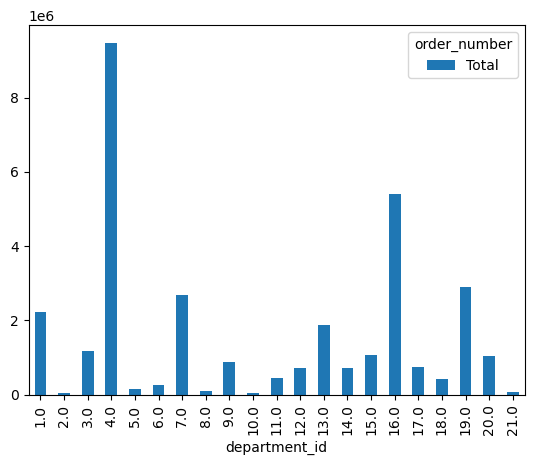

In [73]:
bar_14 = pd_df.plot.bar()

In [74]:
bar_14.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Most popular products.png'))

In [75]:
df_1.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_1.loc[(df['prices'] <= 15) & (df_1['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 
df_1.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [76]:
price_frequency = df_1['price_range_loc'].value_counts()

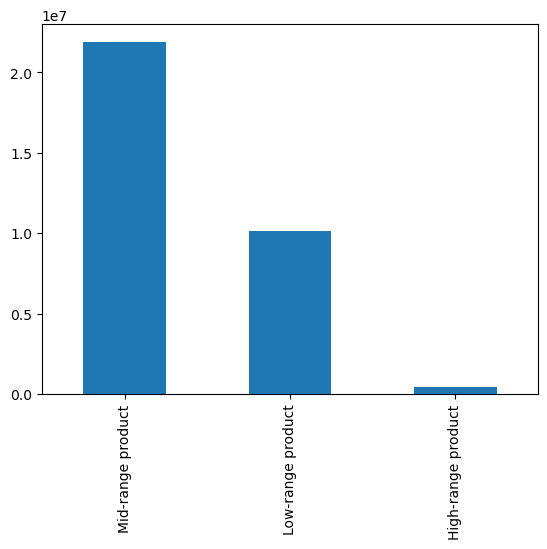

In [77]:
bar_15 = price_frequency.plot.bar()

In [78]:
bar_15.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Products price-range.png'))

In [79]:
popular_price_range = df_1.groupby(['price_range_loc', 'order_number']).size().unstack(fill_value=0)

In [80]:
popular_price_range.head()

order_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
price_range_loc,,,,,,,,,,,,,,,,,,,,,
High-range product,27482,27792,27509,24795,21953,19881,17576,16064,14716,13519,...,157,140,163,147,153,130,122,125,104,93
Low-range product,649550,640713,640101,569226,508690,460293,416129,380916,350546,321105,...,5357,5225,5002,4822,4733,4528,4289,4108,4025,3869
Mid-range product,1400701,1379477,1382707,1225952,1097449,991815,899904,821949,755018,693879,...,11693,11492,11063,10436,10324,9866,9331,9130,8726,8470


In [81]:
popular_price_range.loc[:,'Total'] = popular_price_range.sum(axis=1)

In [82]:
popular_price_range.head()

order_number,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,Total
price_range_loc,,,,,,,,,,,,,,,,,,,,,
High-range product,27482,27792,27509,24795,21953,19881,17576,16064,14716,13519,...,140,163,147,153,130,122,125,104,93,412555
Low-range product,649550,640713,640101,569226,508690,460293,416129,380916,350546,321105,...,5225,5002,4822,4733,4528,4289,4108,4025,3869,10126384
Mid-range product,1400701,1379477,1382707,1225952,1097449,991815,899904,821949,755018,693879,...,11492,11063,10436,10324,9866,9331,9130,8726,8470,21890146


In [83]:
pd_df_2 = popular_price_range.loc[:, ["Total"]]

In [84]:
pd_df_2.head()

order_number,Total
price_range_loc,
High-range product,412555
Low-range product,10126384
Mid-range product,21890146


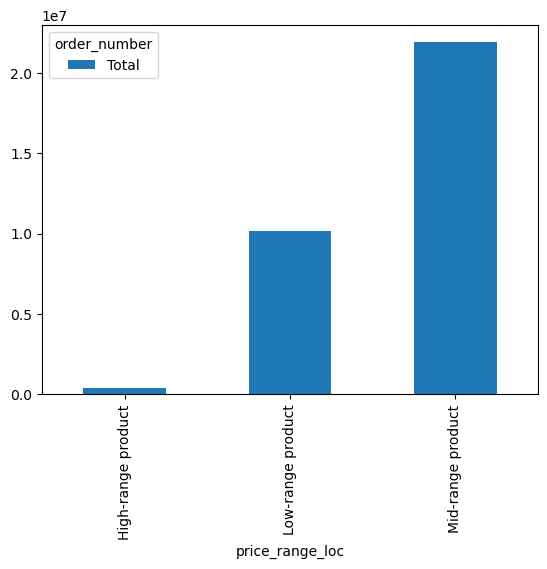

In [85]:
bar_16 = pd_df_2.plot.bar(stacked=True)

In [86]:
bar_16.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Popular price-range.png'))

In [87]:
department_loyalty = df_1.groupby(['department_id', 'loyalty_flag']).size().unstack(fill_value=0)

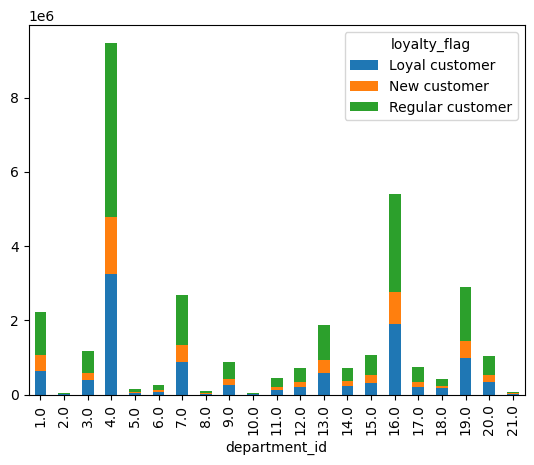

In [88]:
bar_17 = department_loyalty.plot.bar(stacked=True)

In [89]:
bar_17.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'department-loyalty.png'))

In [90]:
region_loyalty = df_1.groupby(['Region', 'loyalty_flag']).size().unstack(fill_value=0)

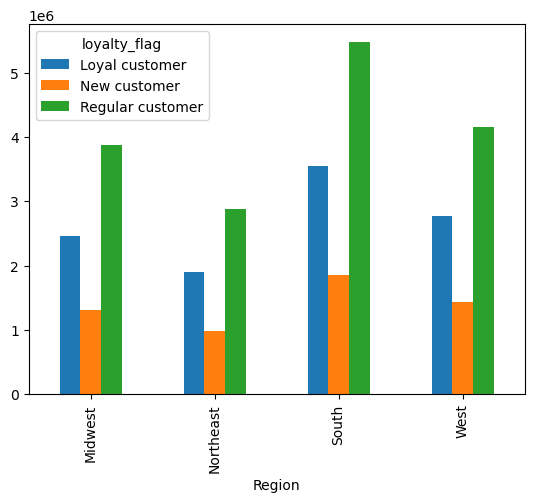

In [91]:
bar_18 = region_loyalty.plot.bar()

In [92]:
bar_18.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Region-loyalty.png'))

In [93]:
age_loyalty = df_1.groupby(['Profil_variable_0', 'loyalty_flag']).size().unstack(fill_value=0)

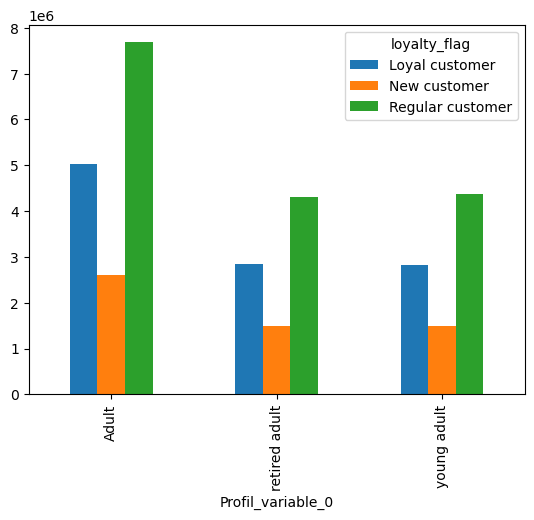

In [94]:
bar_19 = age_loyalty.plot.bar()

In [95]:
bar_19.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'age-loyalty.png'))

In [96]:
spending_loyalty = df_1.groupby(['loyalty_flag', 'Spending_flag']).size().unstack(fill_value=0)

In [97]:
spending_loyalty.head()

Spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,3442669,0
New customer,0,5580444
Regular customer,5312294,0


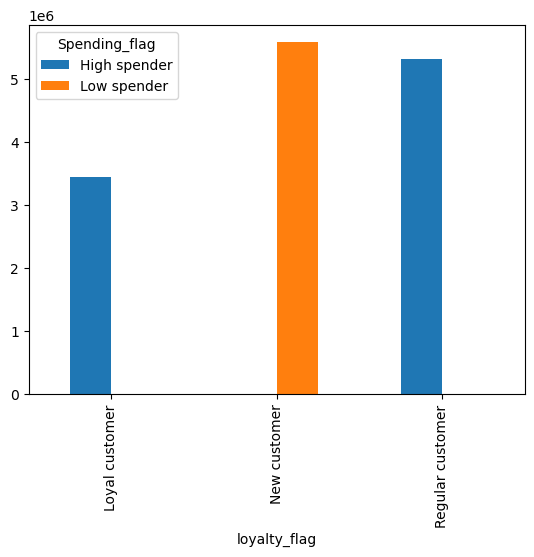

In [98]:
bar_20 = spending_loyalty.plot.bar()

In [99]:
bar_20.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Spending-loyalty.png'))

In [100]:
order_region = df_1.groupby(['department_id', 'Region']).size().unstack(fill_value=0)

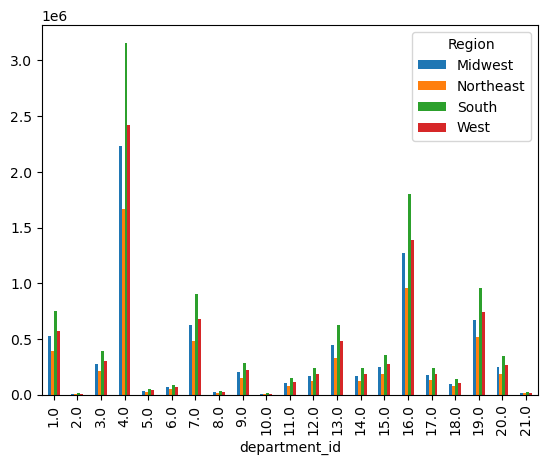

In [101]:
bar_21 = order_region.plot.bar()

In [102]:
bar_21.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'department region.png'))

In [103]:
spending_region = df_1.groupby(['Region', 'Spending_flag']).size().unstack(fill_value=0)

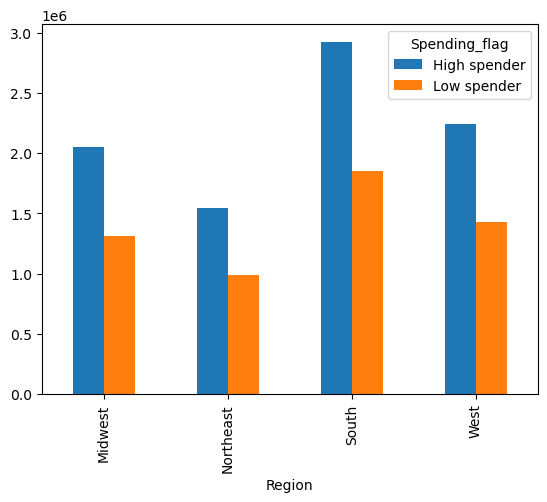

In [104]:
bar_22 = spending_region.plot.bar()

In [105]:
bar_22.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'spending region.png'))

In [106]:
age_region = df_1.groupby(['department_id', 'Profil_variable_0']).size().unstack(fill_value=0)

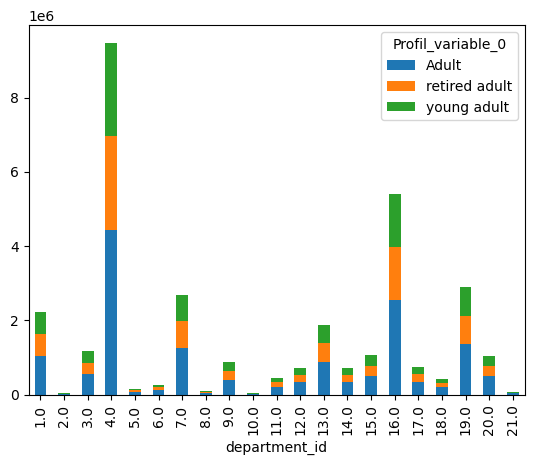

In [107]:
bar_23 = age_region.plot.bar(stacked = True)

In [108]:
bar_23.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'age region.png'))

In [109]:
age_spending = df_1.groupby(['Spending_flag', 'Profil_variable_0']).size().unstack(fill_value=0)

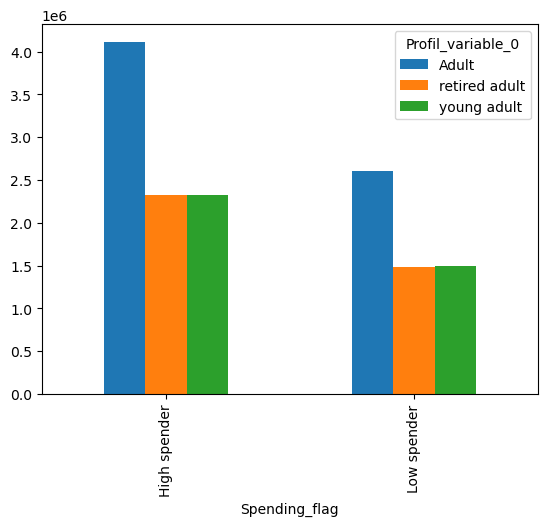

In [110]:
bar_24 = age_spending.plot.bar()

In [111]:
bar_24.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'age spending.png'))

In [112]:
fam_spending = df_1.groupby(['Spending_flag', 'Fam_status']).size().unstack(fill_value=0)

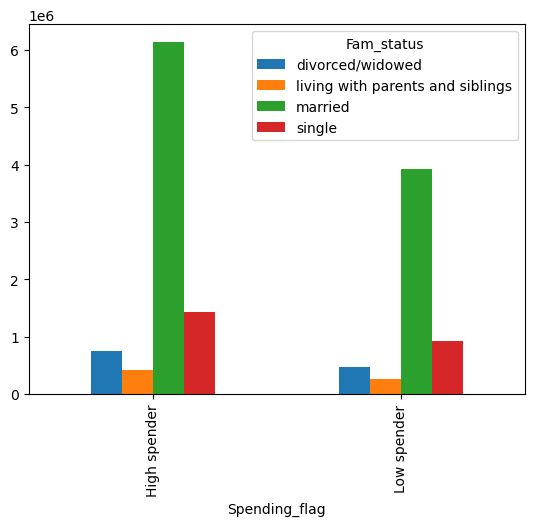

In [113]:
bar_25 = fam_spending.plot.bar()

In [114]:
bar_25.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'family spending.png'))

In [115]:
fam_department = df_1.groupby(['department_id', 'Fam_status']).size().unstack(fill_value=0)

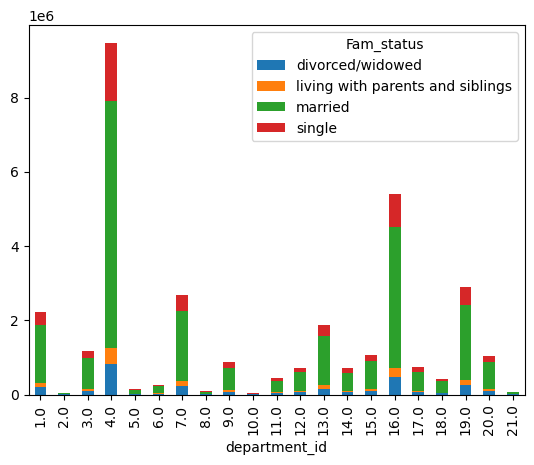

In [116]:
bar_26 = fam_department.plot.bar(stacked = True)

In [117]:
bar_26.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'family department.png'))

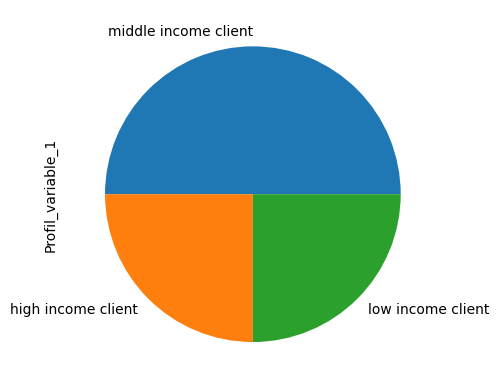

In [118]:
pie_1 = df_1['Profil_variable_1'].value_counts().plot.pie()

In [119]:
pie_1.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Income categories.png'))

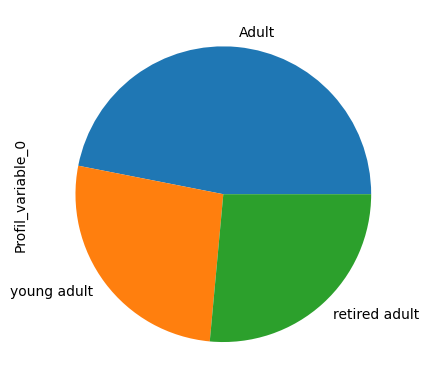

In [120]:
pie_2 = df_1['Profil_variable_0'].value_counts().plot.pie()

In [121]:
pie_2.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Age categories.png'))

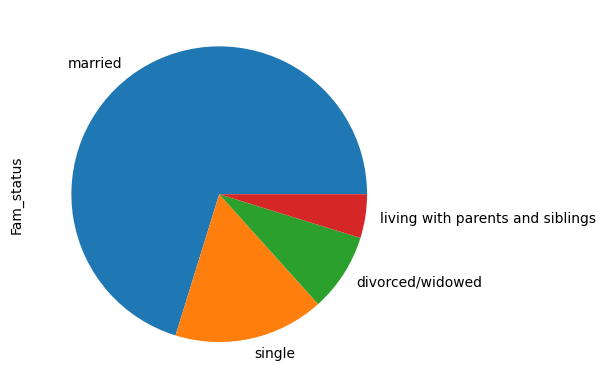

In [122]:
pie_3 = df_1['Fam_status'].value_counts().plot.pie()

In [123]:
pie_3.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'family categories.png'))

In [124]:
Income_department = df_1.groupby(['department_id', 'Profil_variable_1']).size().unstack(fill_value=0)

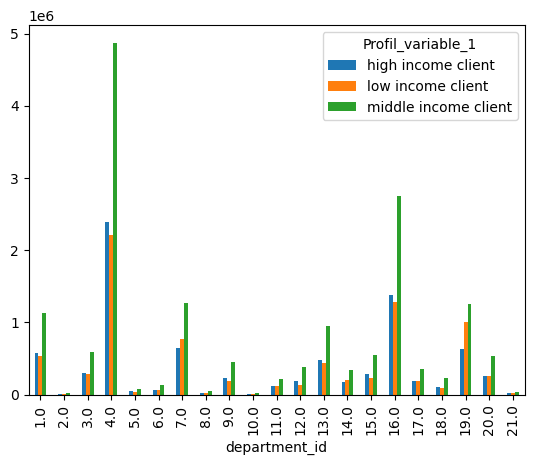

In [125]:
bar_27 = Income_department.plot.bar()

In [126]:
bar_27.figure.savefig(os.path.join(my_path, '4. Analysis', 'Visualisations', 'Income_department.png'))